# Methodes inverses et assimilation - Homework
#### Sara Arioli, M2 STPE, ACSC

In [52]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from mcmc import mcmc
import densities
import my_problemLR

%matplotlib notebook


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Exercise 1

Run MCMC on the inverse problem and study the distribution of the solutions {a,b} around the maximum likelihood. Run the linear_regression_MCMC script after having defined your own logprior and loglikelyhood probability functions (my_problemLR
script). For the different kind of probability functions that you may have tried (gaussian, exponential, …) give the histograms, means, variance of the solution, and your estimation of the posterior density functions shape for a and b (is it Gaussian, exponential, lognormal, poisson,...)

In [138]:
# useful functions

def gauss(x,mean,sigma):
    y = 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mean)**2/(2*sigma**2))
    return y

## Parameter for the problem

<IPython.core.display.Javascript object>


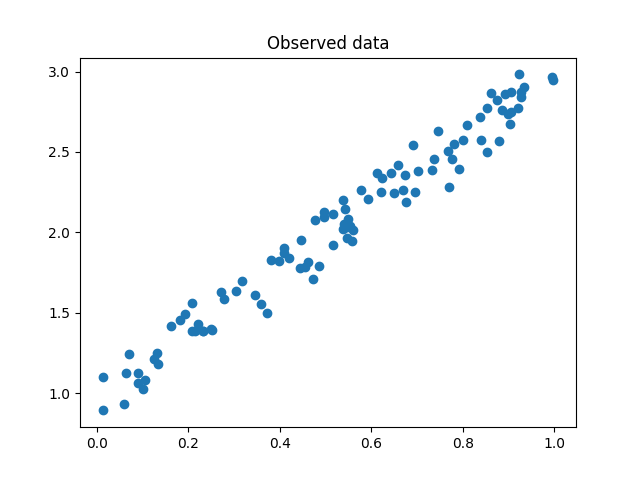

Text(0.5, 1.0, 'Observed data')

In [150]:
# parameters for the problem
Npoint = 100

# data abscissa {Xi}
my_problemLR.Xi = np.random.rand(Npoint)
my_problemLR.sigmad = 0.1 # sec

# Linear regression coefficients to be found
slope = 2.
intercept = 1.

# Create 'observed' data
my_problemLR.Yi = slope * my_problemLR.Xi + intercept + np.random.randn(Npoint) * my_problemLR.sigmad

# Trial solution
X0 = np.array([10., 10.])

plt.figure()
plt.plot(my_problemLR.Xi,my_problemLR.Yi,'o')
plt.title('Observed data')

## Run MCMC

In [55]:
# set the step
step = np.array([0.01, 0.01])# *2 or *5 or *10

niter = 100000


gmout, gmMAP, gaccrate = mcmc(my_problemLR.logprior, my_problemLR.gauss_loglikelyhood,
                           densities.generate, densities.logproposal, X0, niter, step)
emout, emMAP, eaccrate = mcmc(my_problemLR.logprior, my_problemLR.exp_loglikelyhood,
                           densities.generate, densities.logproposal, X0, niter, step)

<IPython.core.display.Javascript object>


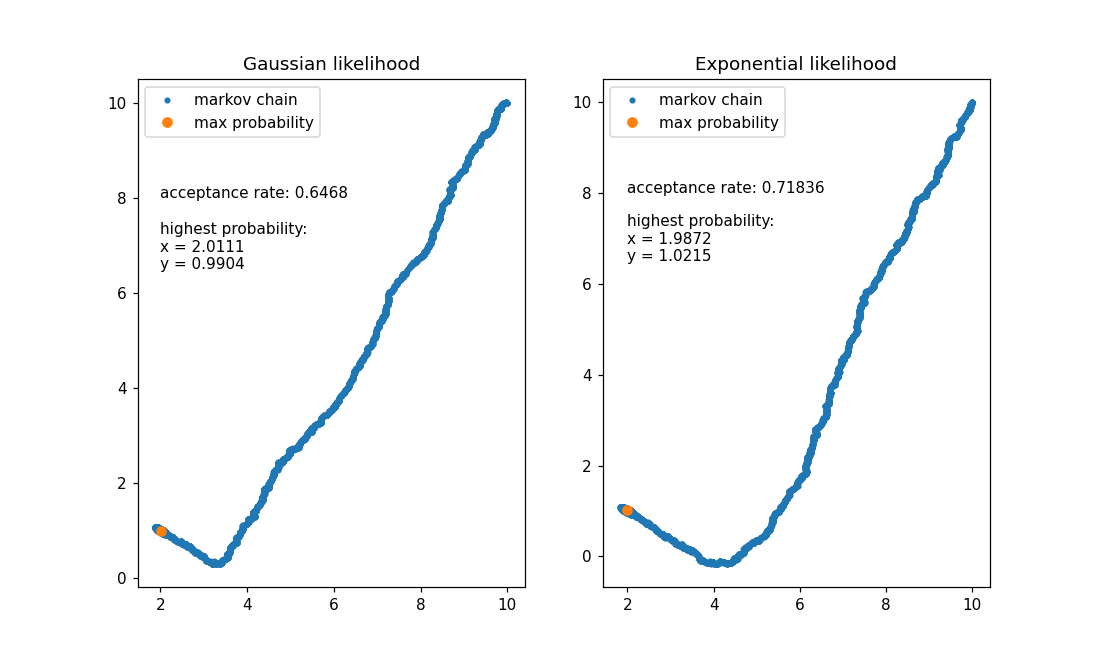

In [80]:
## Plot solutions

gx, gy = gmout[:,0], gmout[:,1]
ex, ey = emout[:,0], emout[:,1]

fig, ax = plt.subplots(1,2,figsize=(10,6))

# MCMC with gaussian likelihood
ax[0].plot(gx,gy,'.',label='markov chain')
ax[0].plot(gmMAP[0],gmMAP[1],'o',label='max probability')
ax[0].set_title('Gaussian likelihood')
ax[0].annotate('acceptance rate: '+str(gaccrate),(2,8))
ax[0].annotate('highest probability:\nx = '+str(gmMAP[0])[:6]+'\ny = '+str(gmMAP[1])[:6],(2,6.5))
ax[0].legend()

# MCMC with exponential likelihood
ax[1].plot(ex,ey,'.',label='markov chain')
ax[1].plot(emMAP[0],emMAP[1],'o',label='max probability')
ax[1].set_title('Exponential likelihood')
ax[1].annotate('acceptance rate: '+str(eaccrate),(2,8))
ax[1].annotate('highest probability:\nx = '+str(emMAP[0])[:6]+'\ny = '+str(emMAP[1])[:6],(2,6.5))
ax[1].legend()

#### Defining the burning period

<IPython.core.display.Javascript object>


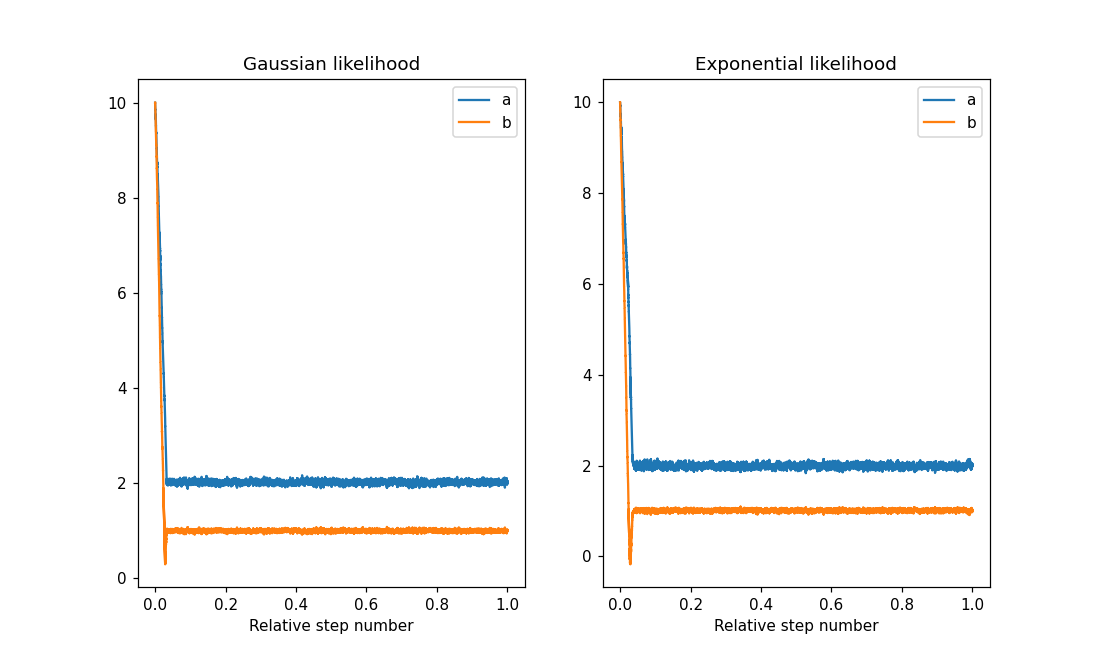

In [81]:
iter = np.arange(0.,niter)
fig, ax = plt.subplots(1,2,figsize=(10,6))

# Gaussian likelihood
ax[0].plot(iter/niter,gmout[:,0],label='a')
ax[0].plot(iter/niter,gmout[:,1],label='b')
ax[0].set_title('Gaussian likelihood')
ax[0].set_xlabel('Relative step number')
ax[0].legend()

# Exponential likelihood
ax[1].plot(iter/niter,emout[:,0],label='a')
ax[1].plot(iter/niter,emout[:,1],label='b')
ax[1].set_title('Exponential likelihood')
ax[1].set_xlabel('Relative step number')
ax[1].legend()

In both cases, the burning period is about the first 4% of measurements.

In [83]:
burning_period = int(0.04*niter)

ga = gmout[burning_period:-1,0]
gb = gmout[burning_period:-1,1]

ea = emout[burning_period:-1,0]
eb = emout[burning_period:-1,1]

print('Length of Markov Chain after removing the burning period:',ga.shape)

Length of Markov Chain after removing the burning period: (95999,)


#### Defining approximately the correlation length

<IPython.core.display.Javascript object>


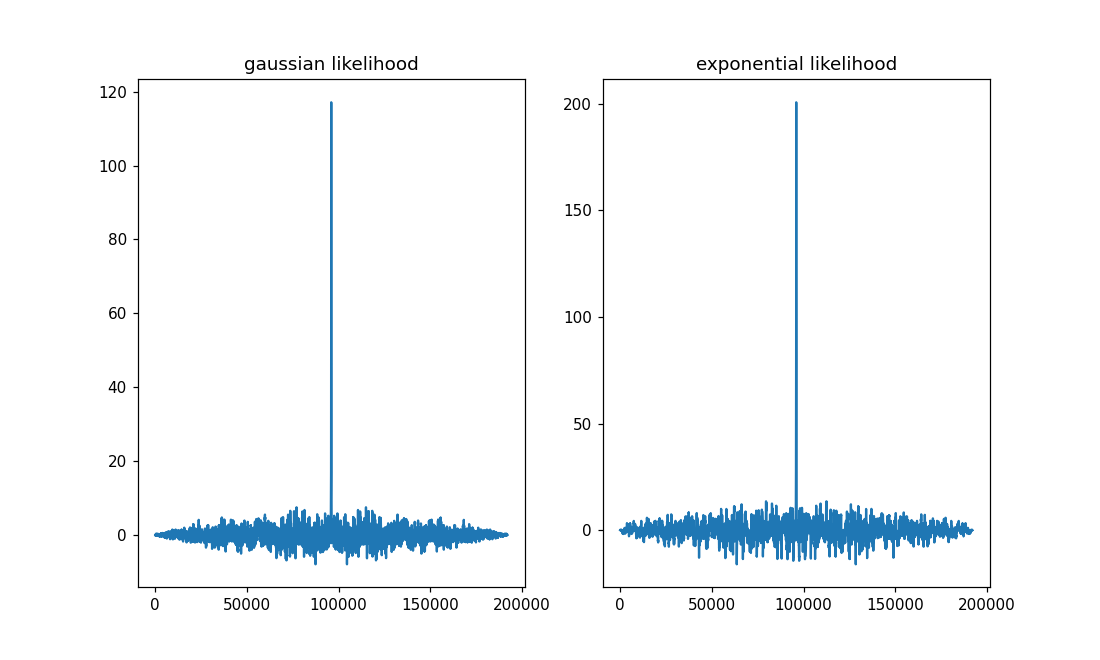

Text(0.5, 1.0, 'exponential likelihood')

In [84]:
import scipy.signal as sig

fig,ax = plt.subplots(1,2,figsize=(10,6))

# gaussian likelihood
ax[0].plot(sig.correlate(ga-np.mean(ga),ga-np.mean(ga)))
ax[0].set_title('gaussian likelihood')

# exponential likelihood
ax[1].plot(sig.correlate(ea-np.mean(ea),ea-np.mean(ea)))
ax[1].set_title('exponential likelihood')

For the gaussian run, there is one peak every ~300/400 values. Therefore I select one value every 400 values.
For the exponential run, there is one peak every ~400/500 values. Therefore I select one value every 500 values.

In [85]:
ga = ga[0:-1:400]
gb = gb[0:-1:400]

ea = ea[0:-1:500]
eb = eb[0:-1:500]

print('length of the "gaussian" MC: ', ga.shape,'\nlength of the "exponential" MC: ', ea.shape)

length of the "gaussian" MC:  (240,) 
length of the "exponential" MC:  (192,)


<IPython.core.display.Javascript object>


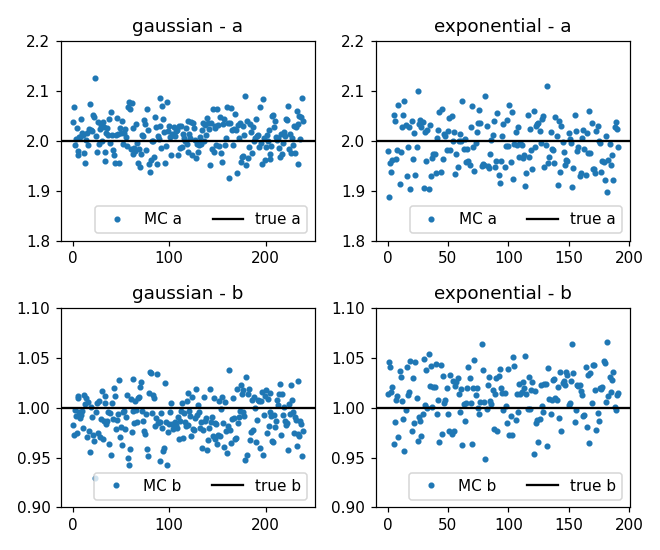

In [113]:
# plot resulting markov chain values

fig, ax = plt.subplots(2,2,figsize=(6,5))

ax[0,0].plot(ga,'.',label='MC a')
ax[0,0].set_title('gaussian - a')
ax[0,0].set_ylim(1.8,2.2)
ax[0,0].axhline(2,c='black',label='true a')
ax[0,0].legend(ncol=2,loc='lower right')

ax[0,1].plot(ea,'.',label='MC a')
ax[0,1].set_title('exponential - a')
ax[0,1].set_ylim(1.8,2.2)
ax[0,1].axhline(2,c='black',label='true a')
ax[0,1].legend(ncol=2,loc='lower right')

ax[1,0].plot(gb,'.',label='MC b')
ax[1,0].set_title('gaussian - b')
ax[1,0].set_ylim(0.9,1.1)
ax[1,0].axhline(1,c='black',label='true b')
ax[1,0].legend(ncol=2,loc='lower right')

ax[1,1].plot(eb,'.',label='MC b')
ax[1,1].set_title('exponential - b')
ax[1,1].set_ylim(0.9,1.1)
ax[1,1].axhline(1,c='black',label='true b')
ax[1,1].legend(ncol=2,loc='lower right')

fig.tight_layout()

## Represent histogram for slope and intercept

<IPython.core.display.Javascript object>


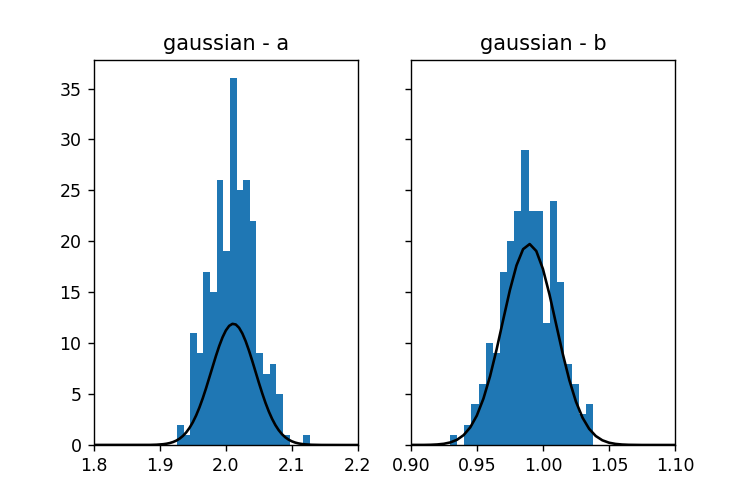

Highest probability solution with gaussian likelihood:    a =  2.011194816312006 ,  b =  0.9904672244097433 
Mean solution with gaussian likelihood: 
a =  2.0113 +- 0.0335 
b =  0.9896 +- 0.0202


In [148]:
fig,ax = plt.subplots(1,2,figsize=(6,4),sharey=True)

x = np. arange(0.5,2.5,0.005)

ax[0].hist(ga,20)
ax[0].plot(x,gauss(x,np.mean(ga),np.std(ga)),'-',c='black')
ax[0].set_xlim(1.8,2.2)
ax[0].set_title('gaussian - a')

ax[1].hist(gb,20)
ax[1].plot(x,gauss(x,np.mean(gb),np.std(gb)),'-',c='black')
ax[1].set_xlim(0.9,1.1)
ax[1].set_title('gaussian - b')

print('Highest probability solution with gaussian likelihood:    a = ',gmMAP[0],',  b = ',gmMAP[1],
      '\nMean solution with gaussian likelihood:',
      '\na = ',str(np.mean(ga))[:6]+' +- '+str(np.std(ga))[:6],
      '\nb = ',str(np.mean(gb))[:6]+' +- '+str(np.std(gb))[:6])

<IPython.core.display.Javascript object>


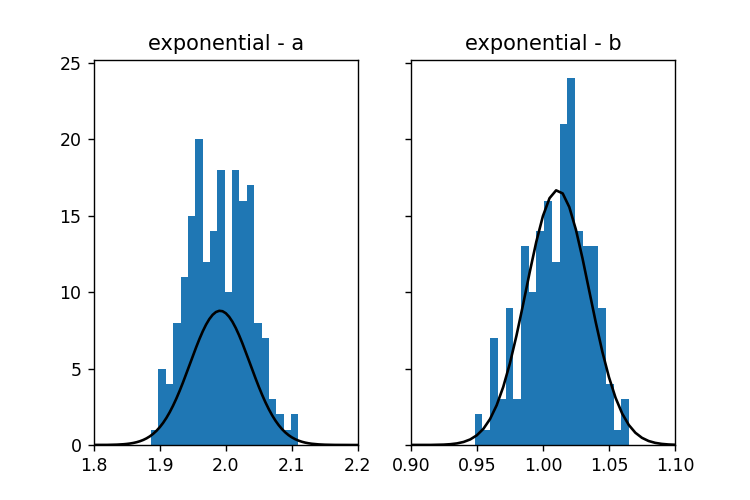

Highest probability solution with exponential likelihood:    a =  1.9872445912185415 ,  b =  1.0215165863193076 
Mean solution with exponential likelihood: 
a =  1.9912 +- 0.0454 
b =  1.0110 +- 0.0239


In [147]:
fig,ax = plt.subplots(1,2,figsize=(6,4),sharey=True)

x = np. arange(0.5,2.5,0.005)

ax[0].hist(ea,20)
ax[0].plot(x,gauss(x,np.mean(ea),np.std(ea)),'-',c='black')
ax[0].set_xlim(1.8,2.2)
ax[0].set_title('exponential - a')

ax[1].hist(eb,20)
ax[1].plot(x,gauss(x,np.mean(eb),np.std(eb)),'-',c='black')
ax[1].set_xlim(0.9,1.1)
ax[1].set_title('exponential - b')

print('Highest probability solution with exponential likelihood:    a = ',emMAP[0],',  b = ',emMAP[1],
      '\nMean solution with exponential likelihood:',
      '\na = ',str(np.mean(ea))[:6]+' +- '+str(np.std(ea))[:6],
      '\nb = ',str(np.mean(eb))[:6]+' +- '+str(np.std(eb))[:6])

# Exercise 2

When MCMC is not appropriate to solve the problem, one can try the bootstrap or jackknife methods: create a set of solutions by changing a subset of the data. Here we look at the bootstrap method. Go back to the course and the least-square solution for the linear regression problem. Use regularization if needed. One you have created a dataset of N points {Xi}, {Yi} with random noise, you will remove randomly 10% of the N {Xi} and {Yi} values, and replace them with a duplicate of the 90% others. Ex: N=100, we remove the last 10 values from i=91 to i=100, and replace them by the 10 first values i=1 to i=10. By doing so, you keep the same number of points: 100, but some points are duplicated. Run the least-square inversion, keep the results and retry again with a different subset of data. Do this several times, you will have a set of
says 100 solutions from different selection of {Xi}, {Yi} values. Study the statistics of these solutions (histogram, mean, variance) and compare to the results of the first solution.

In [258]:
from numpy import linalg as lg
from scipy.optimize import least_squares
from scipy.stats import linregress

def residual(x0):
    res = booty-(x0[0]*bootx+x0[1])
    return res

In [264]:
# bootstrap implementation

index = np.arange(0,100)

cost = []
slope = []
inter = []

for i in range(150):
    np.random.seed(14*i**2+12*i+37)
    sample = np.random.choice(index, size=90)
    sample = np.append(sample,sample[:10])                   # choice of 100 random indeces (of which 10 are repeated)
    bootx = my_problemLR.Xi[sample]
    booty = my_problemLR.Yi[sample]
    sol = least_squares(residual,np.zeros(2,))#,method='dogbox')
    if sol.success:
        cost.append(sol.cost)
        slope.append(sol.x[0])
        inter.append(sol.x[1])

<IPython.core.display.Javascript object>


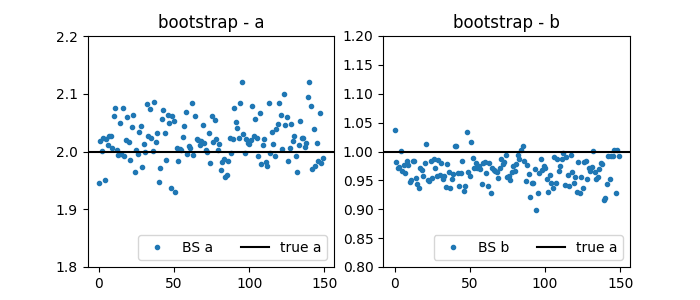

In [265]:
# plot results

fig, ax = plt.subplots(1,2,figsize=(7,3))

ax[0].plot(slope,'.',label='BS a')
ax[0].set_title('bootstrap - a')
ax[0].set_ylim(1.8,2.2)
ax[0].axhline(2,c='black',label='true a')
ax[0].legend(ncol=2,loc='lower right')

ax[1].plot(inter,'.',label='BS b')
ax[1].set_title('bootstrap - b')
ax[1].set_ylim(0.8,1.2)
ax[1].axhline(1,c='black',label='true a')
ax[1].legend(ncol=2,loc='lower right')

<IPython.core.display.Javascript object>


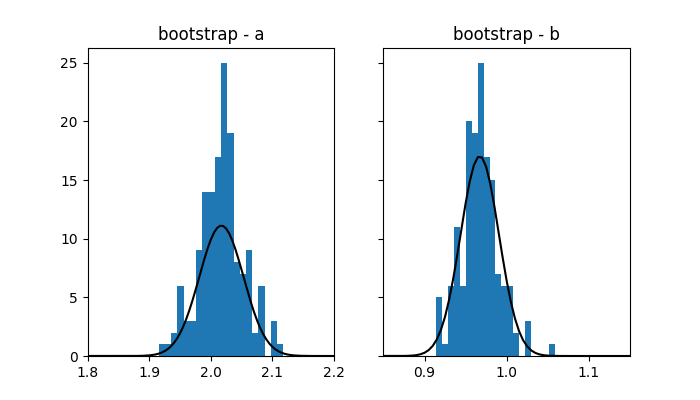

Mean solution with bootstrap: 
a =  2.0171 +- 0.0358 
b =  0.9672 +- 0.0234


In [259]:
fig,ax = plt.subplots(1,2,figsize=(7,4),sharey=True)

x = np. arange(0.5,2.5,0.005)

ax[0].hist(slope,20)
ax[0].plot(x,gauss(x,np.mean(slope),np.std(slope)),'-',c='black')
ax[0].set_xlim(1.8,2.2)
ax[0].set_title('bootstrap - a')

ax[1].hist(inter,20)
ax[1].plot(x,gauss(x,np.mean(inter),np.std(inter)),'-',c='black')
ax[1].set_xlim(0.85,1.15)
ax[1].set_title('bootstrap - b')

print('Mean solution with bootstrap:',
      '\na = ',str(np.mean(slope))[:6]+' +- '+str(np.std(slope))[:6],
      '\nb = ',str(np.mean(inter))[:6]+' +- '+str(np.std(inter))[:6])

# Comparison

<IPython.core.display.Javascript object>


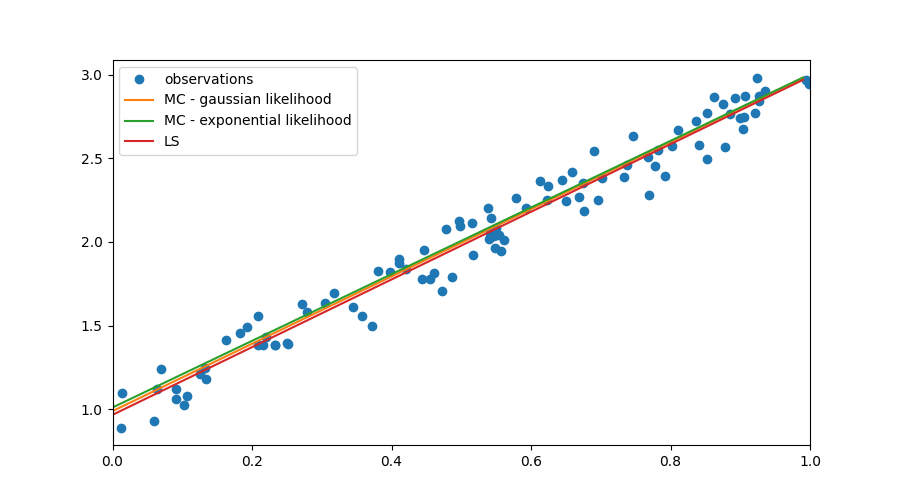

In [266]:
plt.figure(figsize=(9,5))
xx = np.arange(0,1,0.01)
plt.xlim(0,1)
plt.plot(my_problemLR.Xi,my_problemLR.Yi,'o',label='observations')
plt.plot(xx,xx*np.mean(ga)+np.mean(gb),'-',label='MC - gaussian likelihood')
plt.plot(xx,xx*np.mean(ea)+np.mean(eb),'-',label='MC - exponential likelihood')
plt.plot(xx,xx*np.mean(slope)+np.mean(inter),'-',label='LS')
plt.legend()